In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from matplotlib import colors

Funkcje do zaimplementowania:

In [2]:

def hsv2rgb(h, s, v):
    #convert hsv to rgb use matplotlib.colors
    return colors.hsv_to_rgb((h, s, v))


def gradient_rgb_bw(v):
    return (v, v, v)


def gradient_rgb_gbr(v):
    #get from green to blue to red
    if v < 0.5:
        red = 0
        green = 1 - 2*v
        blue = 2*v
    else:
        red = 2*v - 1
        green = 0
        blue = 2 - 2*v

    
    return (red, green, blue)



def gradient_rgb_gbr_full(v):
    # green -> green+blue -> blue -> blue+red -> red
    if v < 0.25:
        red = 0
        green = 1
        blue = 4*v
    elif v < 0.5:
        red = 0
        green = 2 - 4*v
        blue = 1
    elif v < 0.75:
        red = 4*v - 2
        green = 0
        blue = 1
    else:
        red = 1
        green = 0
        blue = 4 - 4*v
        
    return (red, green, blue)


def gradient_rgb_wb_custom(v):
    #from white -> thru all -> to black
    if v < 0.1:
        #from white to red in hsv
        #expand v from 0-0.1 to 0-1
        v = v * 10
        
        r,g,b = hsv2rgb(1, v, 1)
    elif v < 0.9:
        #expand v from 0.1-0.9 to 0-1
        v = (v - 0.1) * 1.25
        r,g,b = hsv2rgb(v, 1, 1)
        
    else:
        #expand v from 0.9-1 to 0-1
        v = (v - 0.9) * 10
        r,g,b = hsv2rgb(1, 1, 1-v)
        
        
    return (r, g, b)


def gradient_hsv_bw(v):
    #from black to white using hsv
    return hsv2rgb(0, 0, v)


def gradient_hsv_gbr(v):
        #for values from 0 to 1 return gradient green->blue->red
    green_value = 0.33
    #reduce v multiplie
    v = v * 0.66
    
    #set new value as modulo of v (green_value + v) %1.0
    new_value = (green_value + v) % 1.0
    r,g,b = hsv2rgb(new_value, 1, 1)
    return (r, g, b)

def gradient_hsv_unknown(v):
    #go from green to red
    return hsv2rgb(0.33-v/3, 0.5, 1)


def gradient_hsv_custom(v):
    hue = (v ** 2) % 1.0  # Squaring the x-value and using modulo for variation
    saturation = (v * 0.2) % 1.0  # Adding 0.2 to the y-value and using modulo for variation
    value = 1.0  # Value is constant

    return hsv2rgb(hue, saturation, value)

In [3]:
def plot_color_gradients(gradients, names):
    # For pretty latex fonts (commented out, because it does not work on some machines)
    #rc('text', usetex=True) 
    #rc('font', family='serif', serif=['Times'], size=10)
    rc('legend', fontsize=10)

    column_width_pt = 400         # Show in latex using \the\linewidth
    pt_per_inch = 72
    size = column_width_pt / pt_per_inch

    fig, axes = plt.subplots(nrows=len(gradients), sharex=True, figsize=(size, 0.75 * size))
    fig.subplots_adjust(top=1.00, bottom=0.05, left=0.25, right=0.95)


    for ax, gradient, name in zip(axes, gradients, names):
        # Create image with two lines and draw gradient on it
        img = np.zeros((2, 1024, 3))
        for i, v in enumerate(np.linspace(0, 1, 1024)):
            img[:1, i] = gradient(v)
            img[:2, i] = gradient(v)
            

        im = ax.imshow(img, aspect='auto')
        im.set_extent([0, 1, 0, 1])
        ax.yaxis.set_visible(False)

        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.25
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='left', fontsize=10)

    fig.savefig('my-gradients.pdf')

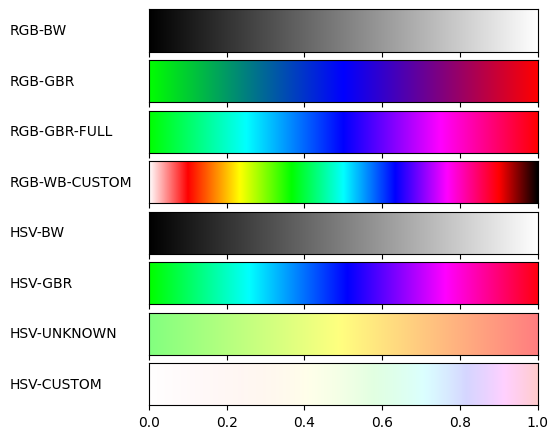

In [4]:
def toname(g):
    return g.__name__.replace('gradient_', '').replace('_', '-').upper()
    
gradients = (gradient_rgb_bw, gradient_rgb_gbr, gradient_rgb_gbr_full, gradient_rgb_wb_custom,
                 gradient_hsv_bw, gradient_hsv_gbr, gradient_hsv_unknown, gradient_hsv_custom)

plot_color_gradients(gradients, [toname(g) for g in gradients])